1. PREPROCESSING DATA 

In [10]:
import pandas as pd
 
df = pd.read_csv("data_pelanggan.csv")
df.tail()

,umur,pendapatan,pembelian_tahunan,loyalitas
95,28,97,14,Loyal
96,27,84,5,Tidak Loyal
97,31,104,4,Tidak Loyal
98,53,85,8,Loyal
99,52,46,8,Tidak Loyal


Ringkasan Statistik

In [15]:
df.describe()

,umur,pendapatan,pembelian_tahunan,Label
count,100.000000,100.000000,100.000000,100.0
mean,38.790000,74.090000,6.660000,1.0
std,11.556008,26.947797,3.929222,0.0
min,20.000000,30.000000,1.000000,1.0
25%,28.000000,55.250000,3.000000,1.0
50%,39.500000,75.000000,6.000000,1.0
75%,47.250000,92.500000,9.000000,1.0
max,59.000000,119.000000,14.000000,1.0


In [2]:
df.info()
print("\nMissing values:\n", df.isnull().sum())
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   umur               100 non-null    int64 
 1   pendapatan         100 non-null    int64 
 2   pembelian_tahunan  100 non-null    int64 
 3   loyalitas          100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.3+ KB

Missing values:
 umur                 0
pendapatan           0
pembelian_tahunan    0
loyalitas            0
dtype: int64


Index(['umur', 'pendapatan', 'pembelian_tahunan', 'loyalitas'], dtype='object')

Visualisasi Hubungan Pendapatan vs Pembelian Tahunan

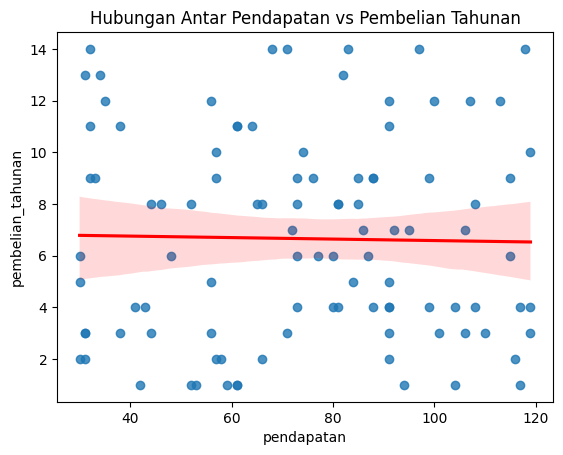

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='pendapatan', y='pembelian_tahunan', data=df, line_kws={"color": "red"})
plt.title('Hubungan Antar Pendapatan vs Pembelian Tahunan')
plt.show()

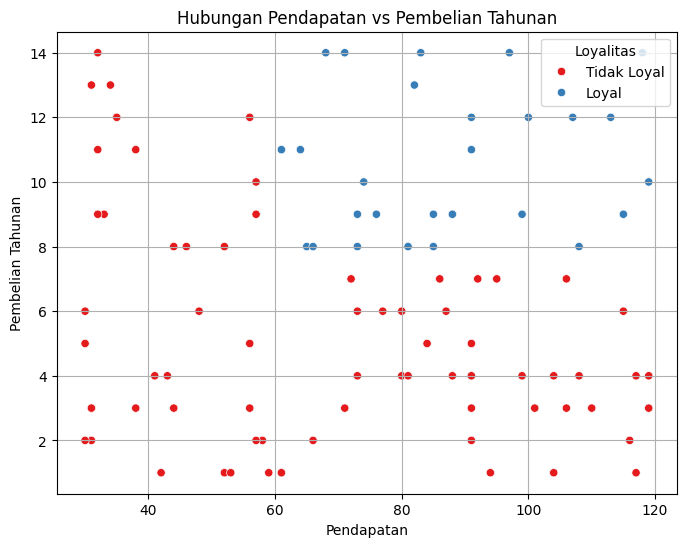

In [23]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x='pendapatan',
    y='pembelian_tahunan',
    hue='loyalitas',
    palette='Set1'
)

plt.title('Hubungan Pendapatan vs Pembelian Tahunan')
plt.xlabel('Pendapatan')
plt.ylabel('Pembelian Tahunan')
plt.legend(title='Loyalitas')
plt.grid(True)
plt.show()

2. IMPLEMENTASI ALGORITMA

Decision Tree

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Fitur dan target
X = df[['pendapatan', 'umur', 'pembelian_tahunan']]
y = df['loyalitas']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (Opsional) Normalisasi - sebenarnya tidak wajib untuk decision tree
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi dan latih Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)

# Prediksi dan evaluasi
y_pred = tree.predict(X_test_scaled)

# Hasil evaluasi
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 6  0]
 [ 0 14]]
              precision    recall  f1-score   support

       Loyal       1.00      1.00      1.00         6
 Tidak Loyal       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['pendapatan', 'umur', 'pembelian_tahunan']]
y = df['loyalitas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)  # k = 5
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 4  2]
 [ 3 11]]
              precision    recall  f1-score   support

       Loyal       0.57      0.67      0.62         6
 Tidak Loyal       0.85      0.79      0.81        14

    accuracy                           0.75        20
   macro avg       0.71      0.73      0.72        20
weighted avg       0.76      0.75      0.75        20

